<h1>Data preprocessing </h1> <br>
Dataset source: Kaggle <br>
Data uptil 27-10-2020

In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import accuracy_score



In [2]:
df=pd.read_csv('covid-19.csv')
df.head()

,Unnamed: 0,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,0,1,30/01/2020,6:00 PM,Kerala,1,0,0,0,1
1,1,2,31/01/2020,6:00 PM,Kerala,1,0,0,0,1
2,2,3,01/02/2020,6:00 PM,Kerala,2,0,0,0,2
3,3,4,02/02/2020,6:00 PM,Kerala,3,0,0,0,3
4,4,5,03/02/2020,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.to_csv('D:\ml\covid-19.csv')

In [4]:
df['Cured'] = df['Cured'].astype(float)

In [5]:
df['Confirmed'] = df['Confirmed'].astype(float)

In [6]:
df['Deaths'] = df['Deaths'].astype(float)

In [7]:
# Calculating active cases
cd=df['Confirmed']-df['Cured']-df['Deaths']
df['Active']=cd
df.head()

,Unnamed: 0,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,0,1,30/01/2020,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
1,1,2,31/01/2020,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
2,2,3,01/02/2020,6:00 PM,Kerala,2,0,0.0,0.0,2.0,2.0
3,3,4,02/02/2020,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0
4,4,5,03/02/2020,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0


In [8]:
df.rename(columns = {'State/UnionTerritory':'state'}, inplace = True) 
df.head()

,Unnamed: 0,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,0,1,30/01/2020,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
1,1,2,31/01/2020,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
2,2,3,01/02/2020,6:00 PM,Kerala,2,0,0.0,0.0,2.0,2.0
3,3,4,02/02/2020,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0
4,4,5,03/02/2020,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0


In [9]:
df.drop(['Sno'], 1,inplace=True)


In [10]:
df.drop(['Time'], 1,inplace=True)


In [11]:
df.drop(['ConfirmedIndianNational'], 1,inplace=True)


In [12]:
df.drop(['ConfirmedForeignNational'], 1,inplace=True)

In [13]:
df.drop(['Unnamed: 0'], 1,inplace=True)

In [14]:
df.tail()

,Date,state,Cured,Deaths,Confirmed,Active
4981,08/08/2020,Telengana,54330.0,615.0,77513.0,22568.0
4982,08/08/2020,Tripura,4084.0,37.0,5999.0,1878.0
4983,08/08/2020,Uttarakhand,5731.0,112.0,8901.0,3058.0
4984,08/08/2020,Uttar Pradesh,66834.0,1981.0,113378.0,44563.0
4985,08/08/2020,West Bengal,63060.0,1954.0,89666.0,24652.0


In [15]:
dateWiseSum=df.groupby('Date').sum()
print(dateWiseSum)

                Cured   Deaths  Confirmed    Active
Date                                               
01/02/2020        0.0      0.0        2.0       2.0
01/03/2020        0.0      0.0        3.0       3.0
01/04/2020      144.0     41.0     1834.0    1649.0
01/05/2020     9065.0   1152.0    34972.0   24755.0
01/06/2020    91819.0   5394.0   190535.0   93322.0
...               ...      ...        ...       ...
30/07/2020  1020582.0  34968.0  1583792.0  528242.0
31/01/2020        0.0      0.0        1.0       1.0
31/03/2020      124.0     35.0     1397.0    1238.0
31/05/2020    86984.0   5164.0   182143.0   89995.0
31/07/2020  1057805.0  35747.0  1638870.0  545318.0

[192 rows x 4 columns]


In [16]:
dateWiseSum.to_csv('D:\ml\c19.csv')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
stateWiseSum=df.groupby('state').sum()
print(stateWiseSum)

                                              Cured    Deaths   Confirmed  \
state                                                                       
Andaman and Nicobar Islands                  8392.0      99.0     16316.0   
Andhra Pradesh                            1630279.0   34980.0   3210646.0   
Arunachal Pradesh                           17134.0     102.0     37032.0   
Assam                                      786583.0    2627.0   1148593.0   
Bihar                                      943713.0    9535.0   1459134.0   
Cases being reassigned to states                0.0       0.0    345565.0   
Chandigarh                                  31706.0     695.0     47336.0   
Chhattisgarh                               201510.0    1525.0    290715.0   
Dadar Nagar Haveli                             14.0       0.0       186.0   
Dadra and Nagar Haveli and Daman and Diu    17751.0      50.0     29758.0   
Daman & Diu                                     0.0       0.0         2.0   

In [19]:
stateWiseSum.to_csv('D:\ml\covidsort.csv')

<h1>Data Visualisation </h1>

In [31]:
#importing of cases till 27th October 2020
sd=pd.read_csv('statewise27th.csv')
sd.drop(['Unnamed: 0'], 1,inplace=True)
sd.head()

,state,Cured,Deaths,Confirmed,Active
0,Andaman and Nicobar Islands,3997.0,58.0,4253.0,198.0
1,Andhra Pradesh,773548.0,6606.0,808924.0,28770.0
2,Arunachal Pradesh,12182.0,35.0,14391.0,2174.0
3,Assam,188587.0,908.0,204386.0,14891.0
4,Bihar,201942.0,1058.0,212355.0,9355.0


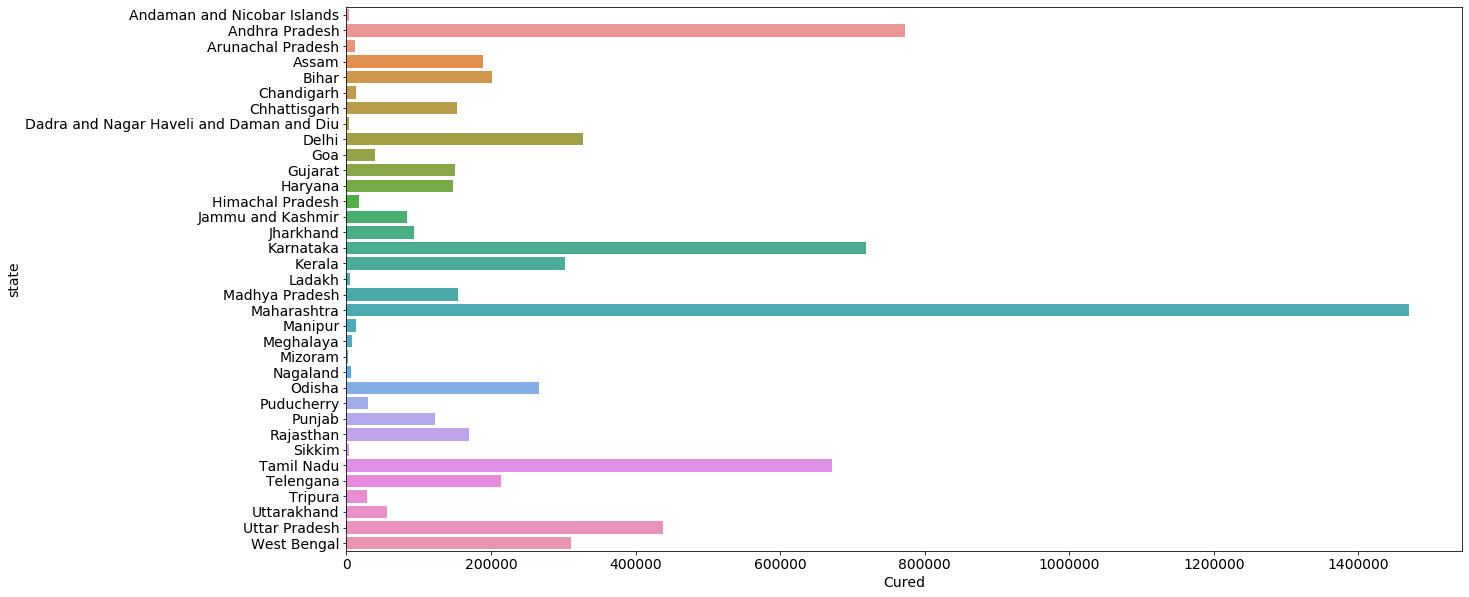

In [32]:
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size'] = 14.0
sns.barplot(x='Cured', y='state',data=sd)

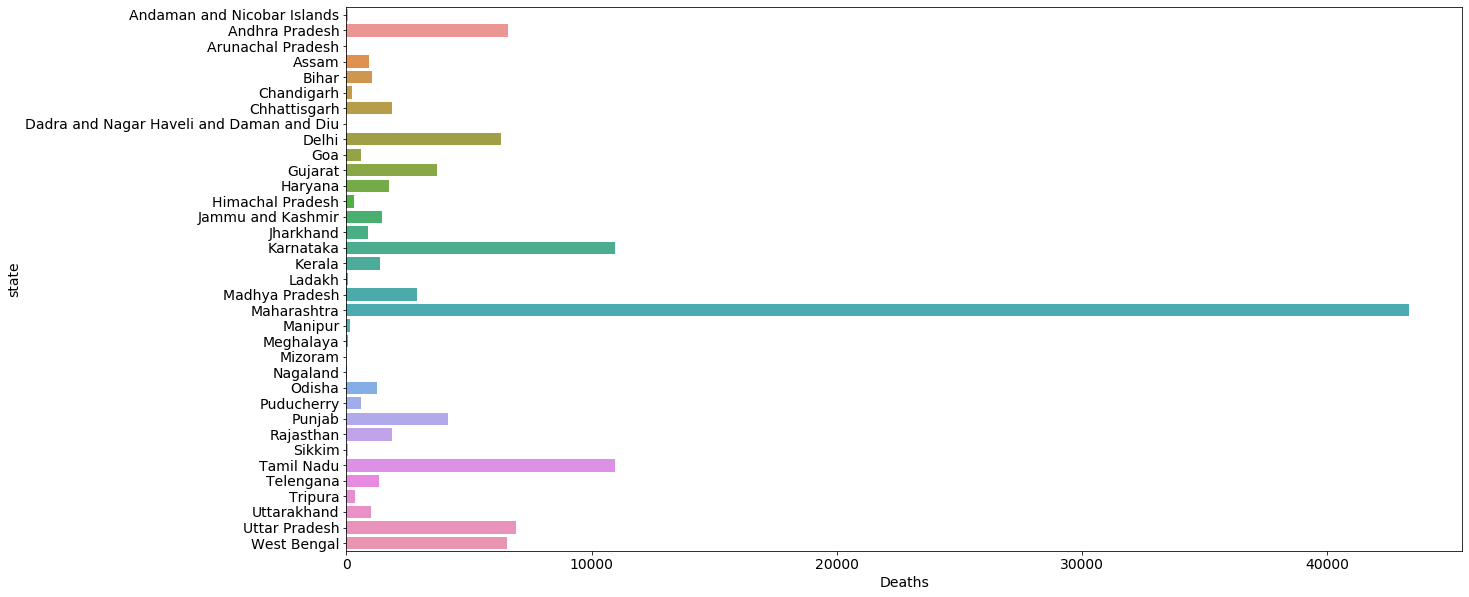

In [33]:
#State vs Deaths
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size'] = 14.0
sns.barplot(x='Deaths', y='state',data=sd)

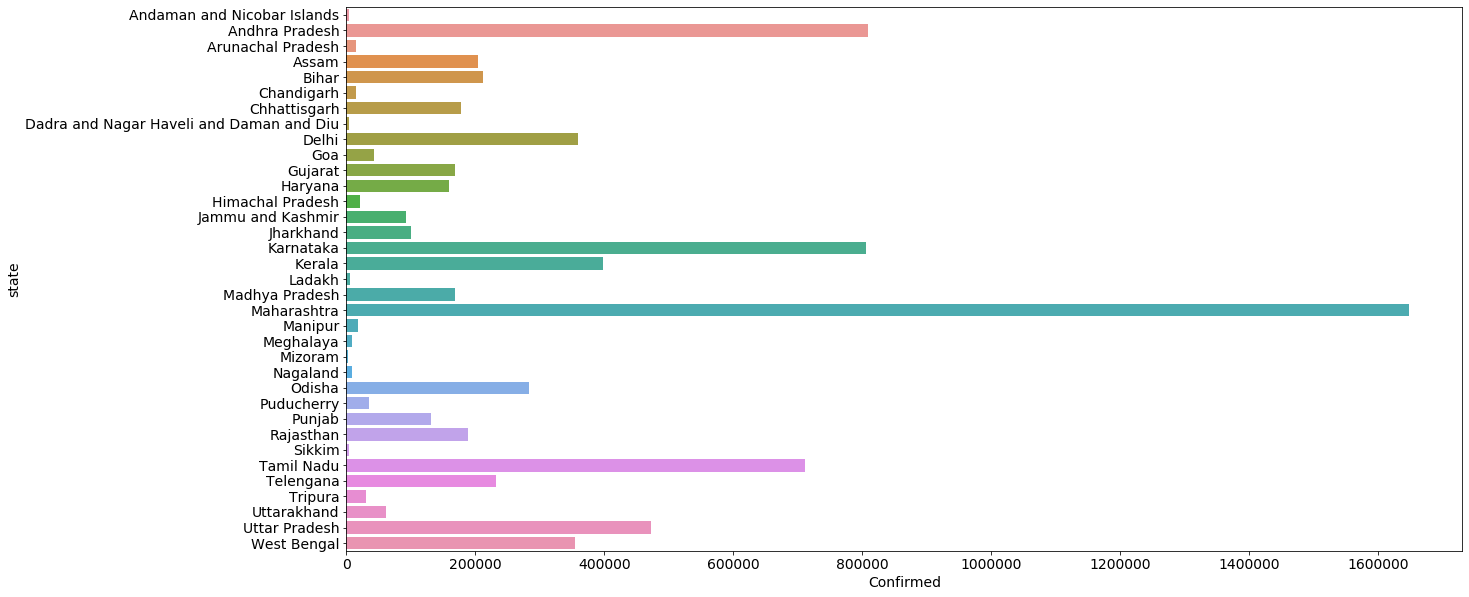

In [34]:
#Confirmed Cases vs State
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size'] = 14.0
sns.barplot(x='Confirmed', y='state',data=sd)

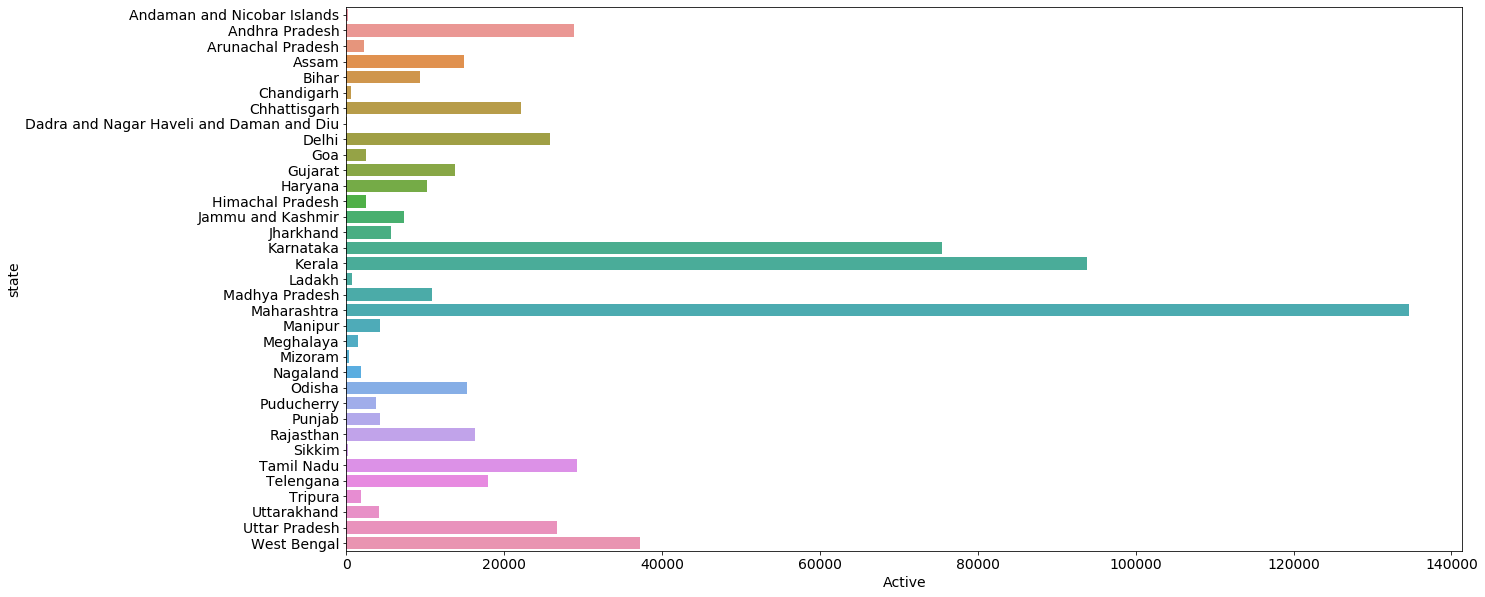

In [35]:
#Active Cases vs State
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size'] = 14.0
sns.barplot(x='Active', y='state',data=sd)

In [36]:
#importing date wise summed csv file
x=pd.read_csv('c19.csv')
x.tail()

,Date,Cured,Deaths,Confirmed,Active
267,23-10-2020,6948497,117306,7761312,695509
268,24-10-2020,7016046,117956,7814682,680680
269,25-10-2020,7078123,118534,7864811,668154
270,26-10-2020,7137228,119014,7909959,653717
271,27-10-2020,7201070,119502,7946429,625857


In [37]:
active=x['Active'].values[271]
print (active)
Confirmed=x['Confirmed'].values[271]
Deaths=x['Deaths'].values[271]
Cured=x['Cured'].values[271]

625857


In [38]:
size = [Confirmed,Deaths,Cured,active]
print(size)

[7946429, 119502, 7201070, 625857]


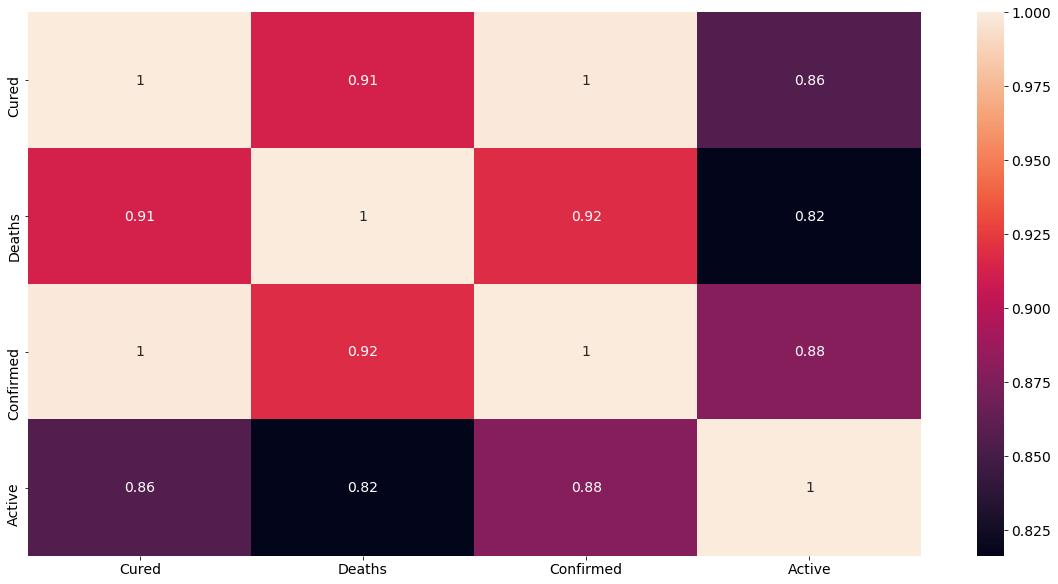

In [39]:
sns.heatmap(sd.corr(), annot= True)

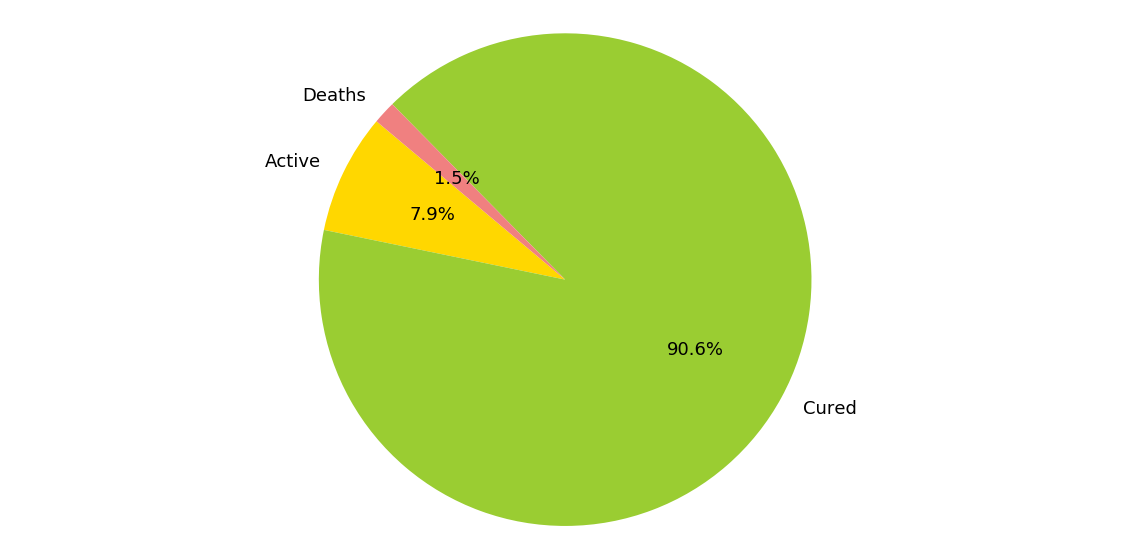

In [40]:
#Pie Chart showing distribution of cases
sizes = [active,Cured,Deaths]
colors = ['gold', 'yellowgreen', 'lightcoral']
labels = 'Active', 'Cured', 'Deaths'
plt.rcParams['font.size'] = 18.0
plt.pie(sizes, colors=colors, autopct='%1.1f%%',labels=labels, startangle=140)



plt.axis('equal')
plt.show()